# Data 구조 및 형태 파악

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"]="Malgun Gothic"  # 한글 출력 관련 설정
plt.rcParams["axes.unicode_minus"]=False  # 마이너스("-") 출력 관련 설정

In [184]:
file_path = "./data/Jobis_3o3.csv"
df = pd.read_csv(file_path)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [185]:
df.shape

(100000, 9)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


> => "income_근로", "income_사업", "income_기타" Feature에 null값 존재 확인

### income 관련 Feature에 존재하는 null값이 어떤 케이스인지 확인

In [187]:
df.query("income_근로 == 0 or income_사업 == 0 or income_기타 == 0").head(20)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
114,25.0,M,2016,282000.0,12300.0,True,0.0,1698000.0,170000.0
215,24.0,F,2017,130000.0,5100.0,False,0.0,784000.0,NaN
327,33.0,F,2016,673000.0,12800.0,True,0.0,5169000.0,NaN
347,24.0,F,2018,123000.0,4700.0,True,0.0,740000.0,NaN
513,24.0,F,2017,28000.0,400.0,True,0.0,170000.0,NaN
653,26.0,M,2017,99000.0,6400.0,True,0.0,599000.0,318000.0
670,21.0,M,2017,5000.0,400.0,True,NaN,0.0,NaN
671,29.0,F,2016,127000.0,3400.0,True,0.0,767000.0,NaN
803,25.0,F,2017,168000.0,6400.0,True,0.0,1014000.0,34000.0


> => income 관련 각 Feature별 '0.0'이 입력된 경우와 'NaN'이 입력된 경우가 혼재함 => 두 가지 모두 해당 소득금액이 없는 경우인 것으로 보임 => 2가지 케이스를 굳이 구분할 필요는 없다고 판단되어 '0.0'으로 동일하게 입력하고자 함

### income 관련 Feature별 존재하는 null값 '0.0'으로 채워주기 => "df_v1"

In [188]:
df_v1 = df.fillna(0.0)
df_v1

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0


# 각 Feature별 검토

## 1. age(고객의 만 나이)

In [189]:
df_v1["age"].describe()

count   100000.0
mean        29.0
std          7.8
min         15.0
25%         24.0
50%         27.0
75%         31.0
max         81.0
Name: age, dtype: float64

In [190]:
len(df_v1["age"].unique())  # 고유한 나이대 총 개수 확인

65

(array([1.100e+01, 5.400e+01, 2.730e+02, 9.410e+02, 2.312e+03, 3.702e+03,
        5.443e+03, 7.336e+03, 8.713e+03, 9.417e+03, 8.632e+03, 8.126e+03,
        7.209e+03, 6.087e+03, 4.184e+03, 3.583e+03, 3.098e+03, 2.340e+03,
        2.002e+03, 1.767e+03, 1.436e+03, 1.445e+03, 1.195e+03, 1.132e+03,
        1.031e+03, 8.170e+02, 6.970e+02, 6.380e+02, 4.430e+02, 4.530e+02,
        3.980e+02, 4.570e+02, 5.180e+02, 4.550e+02, 4.120e+02, 4.370e+02,
        4.600e+02, 4.210e+02, 3.000e+02, 2.310e+02, 2.830e+02, 2.150e+02,
        2.090e+02, 1.550e+02, 1.280e+02, 9.100e+01, 6.800e+01, 4.000e+01,
        6.800e+01, 2.600e+01, 2.300e+01, 1.700e+01, 1.200e+01, 1.400e+01,
        1.300e+01, 5.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        7.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([15.        , 16.01538462, 17.03076923, 18.04615385, 19.06153846,
        20.07692308, 21.09230769, 22.10769231, 23.12307692, 24.13846154,
        25.15384615, 26.16923077, 27.18461538, 28

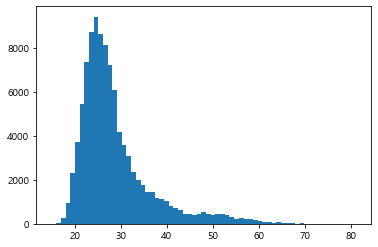

In [191]:
plt.hist(df_v1["age"], bins=65)  # 나이대별 분포 시각화

In [192]:
df_v1["age"].value_counts()  # 나이대별 존재하는 데이터 개수 확인

25.0    9417
24.0    8713
26.0    8632
27.0    8126
23.0    7336
        ... 
81.0       3
77.0       2
15.0       1
79.0       1
73.0       1
Name: age, Length: 65, dtype: int64

### => 평균 29세로 15세~81세의 분포를 보임. 20대 중후반의 데이터가 가장 많은 것을 확인

## 2. gender(고객의 성별)

In [193]:
df_v1["gender"].value_counts()  # 성별에 따른 개수 확인

M    50477
F    49501
-       22
Name: gender, dtype: int64

In [194]:
df_v1[df_v1["gender"] == "-"]  # "gender"가 제대로 입력되지 않은 22개 데이터 내역 확인

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
2613,27.0,-,2016,559000.0,12800.0,False,0.0,0.0,0.0
4101,27.0,-,2017,209000.0,4300.0,False,0.0,0.0,0.0
9574,42.0,-,2015,175000.0,4300.0,False,0.0,0.0,0.0
20536,26.0,-,2017,845000.0,25100.0,False,0.0,0.0,0.0
28211,26.0,-,2016,650000.0,12800.0,False,0.0,0.0,0.0
36217,27.0,-,2018,124000.0,3400.0,False,0.0,0.0,0.0
37674,27.0,-,2015,252000.0,8500.0,False,0.0,0.0,0.0
38223,53.0,-,2015,6000.0,400.0,False,0.0,0.0,0.0
38441,23.0,-,2018,110000.0,3000.0,False,0.0,0.0,0.0
41454,41.0,-,2015,122000.0,4300.0,True,0.0,0.0,0.0


> => 위 22개 데이터에 대해 성별이 확인되지 않으나, 성별 외 다른 Feature는 구분이 가능하므로 삭제하지 않고 유지하기로 함

### => 남성이 50.5%, 여성이 49.5% 수준이며, gender 정보가 입력되지 않은 데이터 22개 존재함 확인

## 3. year(소득이 발생한 연도)

In [195]:
df_v1["year"].value_counts()  # 연도별 데이터 개수 확인

2020    23782
2019    20842
2018    19983
2017    17495
2016    13913
2015     3985
Name: year, dtype: int64

<BarContainer object of 6 artists>

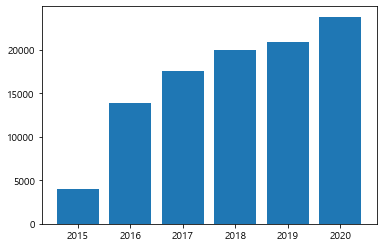

In [196]:
# 연도별 데이터 개수 시각화
x = df_v1["year"].value_counts().sort_values().index
y = df_v1["year"].value_counts().sort_values().values
plt.bar(x, y)

### => 6개년도(2015년~2020년) 데이터가 존재하며, 최근 연도일수록 data수가 증가함을 확인

## 4. refund(예상환급액)

In [197]:
# 과학적표기법 출력 관련, 항상 float 형식으로 출력되도록 설정
pd.set_option("display.float_format", "{:.1f}".format)

In [198]:
df_v1["refund"].describe()

count     100000.0
mean      208142.2
std       307174.4
min     -8265000.0
25%        33000.0
50%        99000.0
75%       254000.0
max      7725000.0
Name: refund, dtype: float64

In [199]:
df_v1["refund"].value_counts().head(20)

5000.0     1998
4000.0     1856
7000.0     1562
6000.0     1233
28000.0    1181
14000.0    1130
11000.0    1084
8000.0     1042
9000.0     1014
10000.0     948
21000.0     889
35000.0     798
13000.0     778
47000.0     773
15000.0     763
25000.0     741
18000.0     730
56000.0     716
38000.0     708
42000.0     686
Name: refund, dtype: int64

### => 예상환급액 평균은 20.8만원 수준으로 5천원 내외 금액대의 개수가 가장 많음을 확인

## 5. fee(수수료)

In [200]:
df_v1["fee"].describe()

count   100000.0
mean      7247.6
std      11926.9
min        400.0
25%        400.0
50%       4300.0
75%       8500.0
max     307000.0
Name: fee, dtype: float64

In [201]:
# refund 평균 대비 fee 평균 비율 산출 => 약 3.48% 수준
(df_v1["fee"].mean() / df_v1["refund"].mean()) * 100

3.4820615940330035

In [202]:
# refund max값 대비 fee max값 비율 산출 => 약 3.97% 수준
(df_v1["fee"].max() / df_v1["refund"].max()) * 100

3.9741100323624594

### => fee는 refund 금액 수준에 따라 산출되는 금액으로 추정되며, 산출 비율은 약 3.48%(평균금액 기준) 수준임

## 6. has_paid(수수료 결제여부)

In [203]:
df_v1["has_paid"].value_counts()

True     64643
False    35357
Name: has_paid, dtype: int64

### => 해당 fee를 결제한 비율이 전체 64.6%로 나타남. 각각의 금액 수준 및 케이스별로 세부 분석 필요

## 7~9. income_근로(근로소득), income_사업(사업소득), income_기타(기타소득)

In [204]:
df_v1[["income_근로", "income_사업", "income_기타"]].describe()  # 각 소득별 data 현황 확인

,income_근로,income_사업,income_기타
count,100000.0,100000.0,100000.0
mean,2623920.6,1182567.1,160725.2
std,5260655.4,2254789.1,795876.1
min,0.0,0.0,0.0
25%,0.0,31000.0,0.0
50%,0.0,328000.0,0.0
75%,2994000.0,1235000.0,2000.0
max,182335000.0,39934000.0,62810000.0


<BarContainer object of 3 artists>

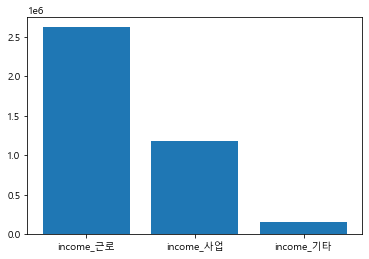

In [205]:
# 각 소득의 평균금액 비교 시각화
x = df_v1[["income_근로", "income_사업", "income_기타"]].columns
y = [df_v1["income_근로"].mean(), df_v1["income_사업"].mean(), df_v1["income_기타"].mean()]
plt.bar(x, y)

### => 근로소득 > 사업소득 > 기타소득 순으로 평균금액이 크게 나타나며, 각 소득 내 금액의 분포는 고르지 않음 확인

# 각 Feature별 검토 결과
* 각각의 데이터가 갖는 의미와 분포 현황 등은 확인되었으나 각 Feature간의 연관성에 기반한 추가 파악 필요
* 특히, 결제여부("has_paid")에 따른 분류를 통해 각 Feature가 갖는 특징을 디테일하게 분석 필요할 것으로 보임

> ##### [ 한가지 의문점 ]<br/><br/> => 고객 1명에 대해 귀속년도별로 여러개의 데이터가 존재할 수 있을텐데, 현 data상으로는 귀속년도별로 동일고객인지 여부를 특정할 수 있는 Feature(id 등)가 존재하지 않음<br/> => 따라서, 해당 data에 기반하여 귀속년도별 동일고객인지 여부는 고려하지 않고 일단 분석을 진행할 예정임

# 고객의 결제여부(has_paid)에 영향을  미치는 요인들 분석

## 전체 Feature간 상관관계 파악

C:\Users\HJ\AppData\Local\Temp/ipykernel_52672/2700979913.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))  # 아래쪽 삼각형만 표시되도록 마스크 적용


<AxesSubplot:>

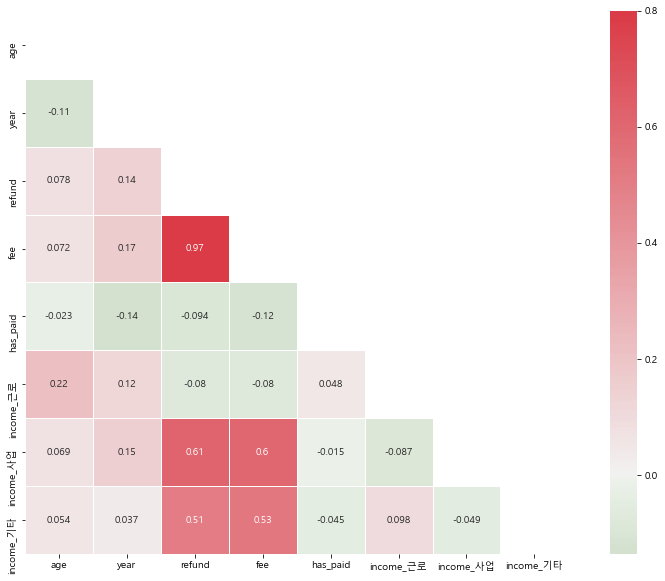

In [206]:
corr = df_v1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))  # 아래쪽 삼각형만 표시되도록 마스크 적용
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(120, 10, as_cmap=True)  # 색상 분류기준 설정
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidth=0.5, annot=True, center=0, vmax=0.8)  # 출력값 범위 등 설정값 적용

> => refund와 fee의 상관관계가 매우 높은 것으로 확인됨 => refund 금액에 따라 fee 금액이 결정되는 것으로 파악

> => 소득 분류 중에서는 사업소득 및 기타소득이 refund 금액과의 상관관계가 높게 나타나며, 근로소득과 refund와의 상관관계는 거의 없는 것으로 확인됨

## 각 소득별 Refund와의 관계 시각화(scatterplot)

c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


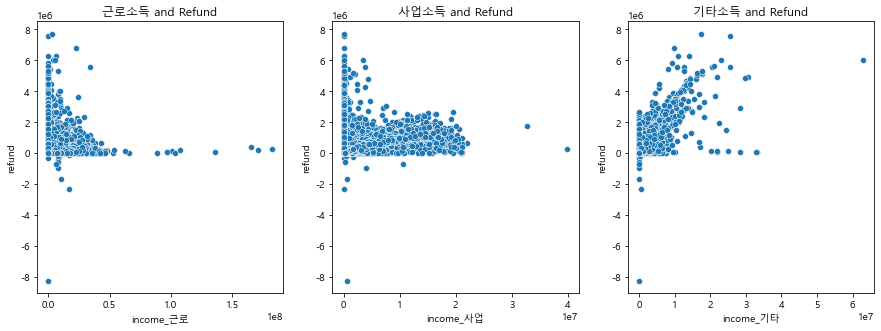

In [207]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
x = df_v1["income_근로"]
y = df_v1["refund"]
sns.scatterplot(x, y)
plt.title("근로소득 and Refund")

plt.subplot(1,3,2)
x = df_v1["income_사업"]
y = df_v1["refund"]
sns.scatterplot(x, y)
plt.title("사업소득 and Refund")

plt.subplot(1,3,3)
x = df_v1["income_기타"]
y = df_v1["refund"]
sns.scatterplot(x, y)
plt.title("기타소득 and Refund")

plt.show()

---

## 고객의 결제여부(has_paid)에 따른 그룹별 특성 비교(1차) - boxplot, stripplot

In [208]:
# 2개 그래프 출력 함수 정의
def show_plot(feature):
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    sns.boxplot(y=df_v1[feature], x=df_v1["has_paid"])
    plt.ylabel(feature, fontsize=12)
    plt.xlabel("has_paid(결제여부)", fontsize=12)
    plt.subplot(1,2,2)
    sns.stripplot(y=df_v1[feature], x=df_v1["has_paid"])
    plt.ylabel(feature, fontsize=12)
    plt.xlabel("has_paid(결제여부)", fontsize=12)
    plt.show()

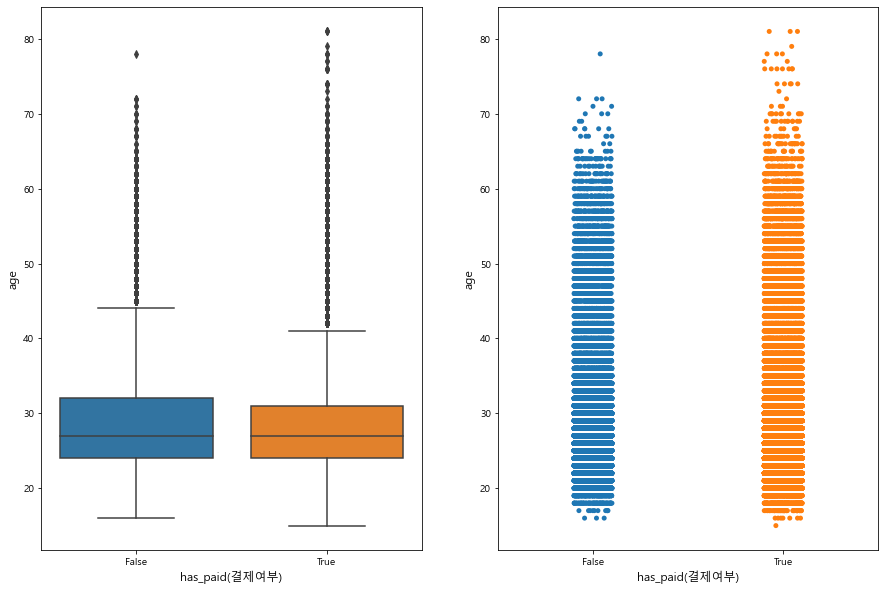

In [209]:
show_plot("age")  # age 피처의 특성 확인

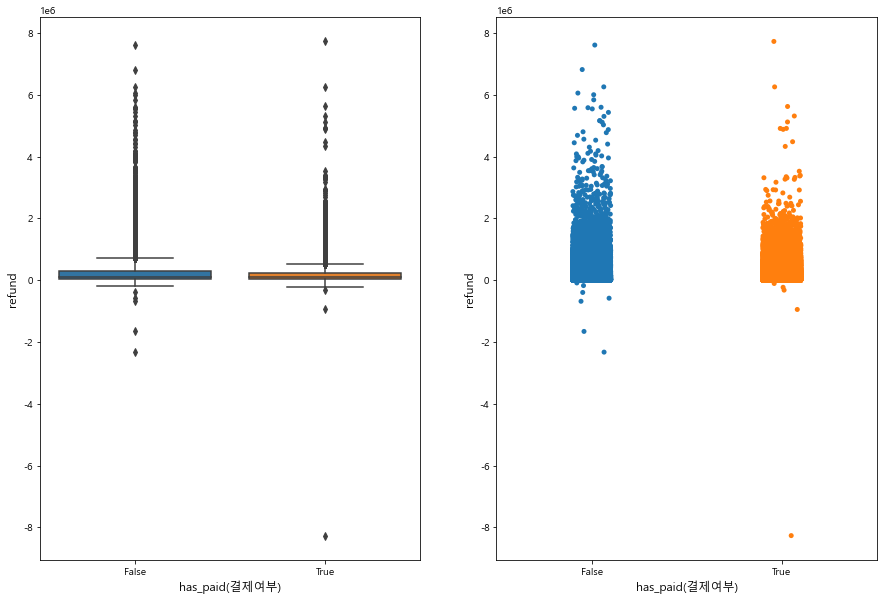

In [210]:
show_plot("refund")  # refund 피처의 특성 확인

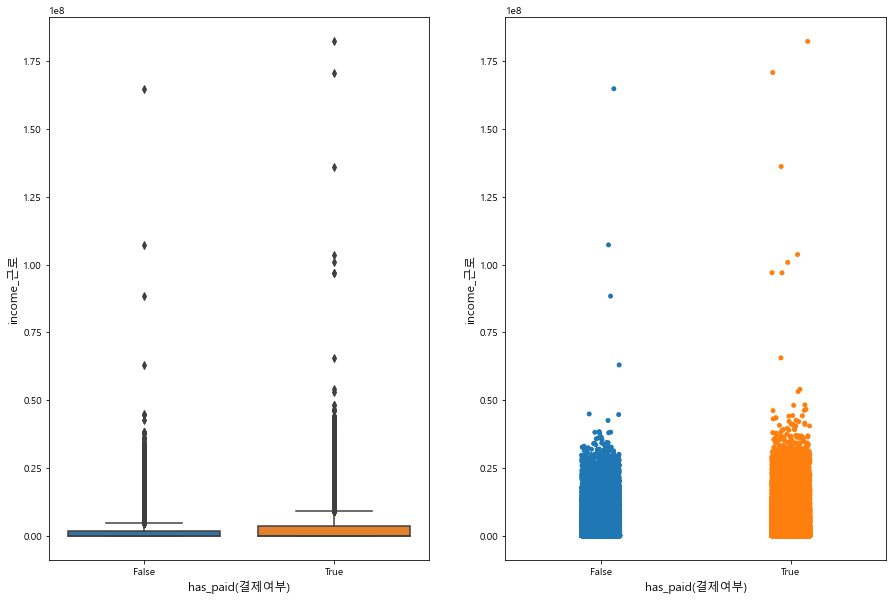

In [211]:
show_plot("income_근로")  # 근로소득 피처의 특성 확인

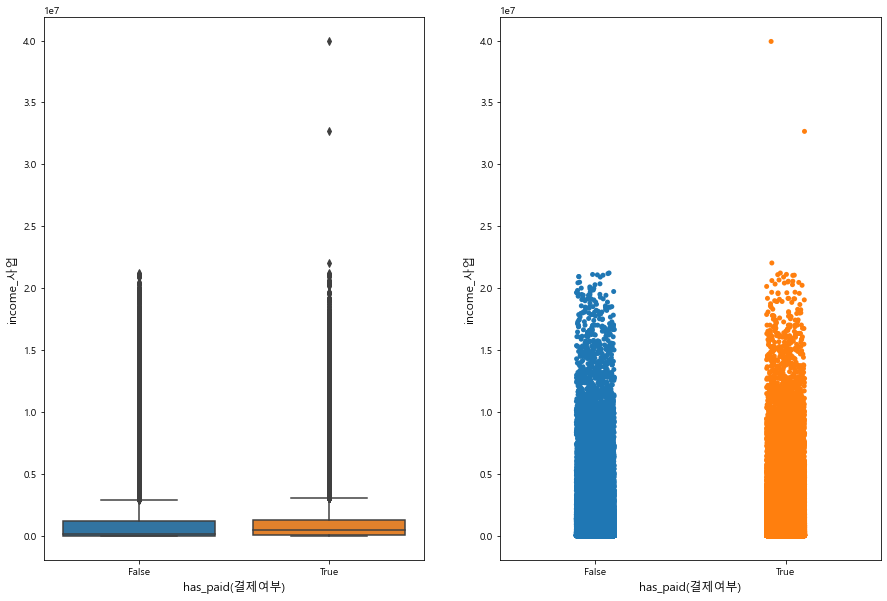

In [212]:
show_plot("income_사업")  # 사업소득 피처의 특성 확인

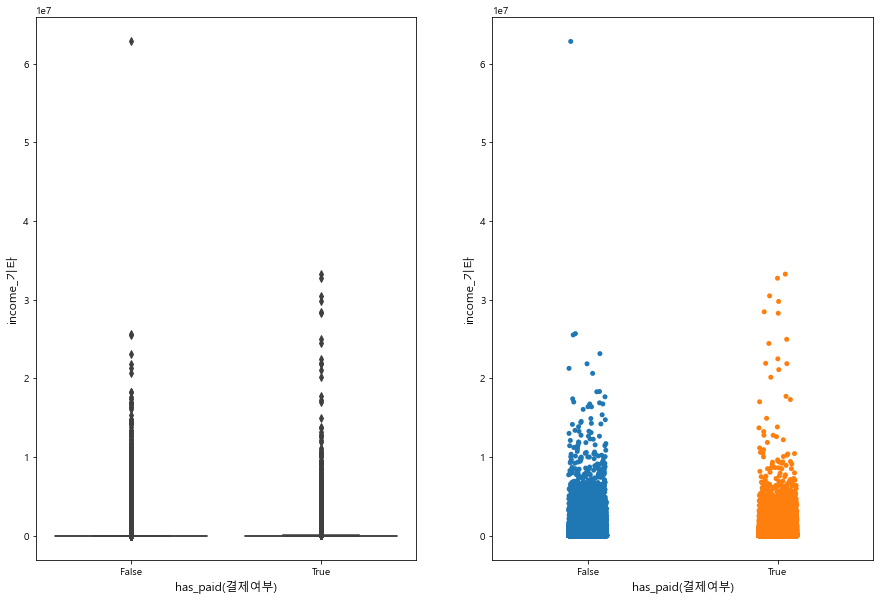

In [213]:
show_plot("income_기타")  # 기타소득 피처의 특성 확인

### => 고객의 결제여부에 따른 그룹별 특성을 시각화해 본 결과, 각 Feature별 일부 차이는 존재하나 의미있는 수준의 분명한 차이를 보여주지는 않음
### => 각 Feature간의 관계를 종합해 다각도로 분석이 필요할 것으로 판단됨

---

## 고객의 결제여부(has_paid)에 따른 그룹별 특성 비교(2차) - 각 Feature간 종합적 분석
* 결제비율(%)을 산출한 뒤, 각 Feature별 다각도로 분석 진행

### 1. 성별, 나이대별 결제 비율 시각화

In [214]:
# 각 성별에 대한 나이대별 결제비율 산출 함수 정의
def get_paid_rate_by_gender(gender):
    # 해당 gender 기준, 나이대별 총 data 개수 산출
    total_count = df_v1[df_v1["gender"] != "-"].groupby(["age", "gender"])["has_paid"].count().unstack()[gender]
    
    # 해당 gender 기준, 나이대별 "has_paid"가 True인 data 개수 산출
    gender_paid = df_v1[df_v1["gender"] != "-"].groupby(["age", "gender", "has_paid"])["has_paid"].count()
    gender_paid = gender_paid.unstack("gender").unstack("has_paid")[(gender, True)]
    
    # 결제비율 계산 => True인 개수 / 총 개수
    paid_rate = (gender_paid / total_count) * 100
    #ret = r.fillna(0)
    
    return paid_rate, total_count

c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


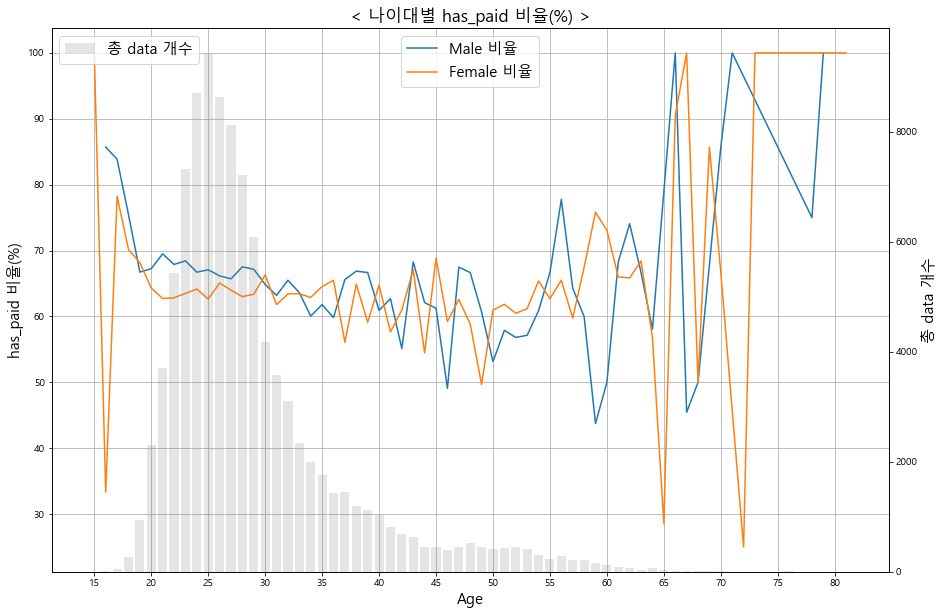

In [215]:
# 나이대별, 성별에 따른 결제비율 시각화 => 총 data 개수 함께 표기

m_paid_rate, m_total = get_paid_rate_by_gender("M")
f_paid_rate, f_total = get_paid_rate_by_gender("F")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # ax1과 x축을 공유하는 ax2 셋팅
fig.set_size_inches(15,10)  # 사이즈 설정

# 성별에 따른 결제비율 lineplot 출력
sns.lineplot(m_paid_rate.index, m_paid_rate.values, ax=ax1)  # male 그래프
sns.lineplot(f_paid_rate.index, f_paid_rate.values, ax=ax1)  # female 그래프
ax1.grid()  # 격자무늬
plt.xticks(np.arange(15, 82, step=5))  # x축 나이대 표기 설정
ax1.legend(["Male 비율", "Female 비율"], loc="upper center", fontsize=15)
ax1.set_xlabel("Age", fontsize=15)
ax1.set_ylabel("has_paid 비율(%)", fontsize=15)

# 총 data 개수 bar그래프 출력
total = f_total.fillna(0) + m_total.fillna(0)
ax2.bar(total.index, total.values, color="gray", alpha=0.2)  # 투명도 등 설정
ax2.legend(["총 data 개수"], loc="upper left", fontsize=15)
ax2.set_ylabel("총 data 개수", fontsize=15)

plt.title("< 나이대별 has_paid 비율(%) >", fontsize=17)
plt.show()

> => 총 data 개수가 많음과 동시에 결제비율의 차이를 나타내는 구간이 확인됨(20세~29세)

> => 20세~29세에서 Male의 결제비율이 Female 대비 상대적으로 높은 것으로 나타남

> => 더불어, 총 data 개수가 일정수준 이상 확보된 20세\~40세 구간 내에서 해당 나이대(20세\~29세)의 결제비율이 비교적 높은 것으로 확인됨

### => 나이대를 기준으로 봤을 때 20세~29세의 결제비율이 상대적으로 높은 것으로 확인되며,
### => 여성보다는 남성의 결제비율이 높은 것으로 나타남

### 2. 성별, Refund 금액수준별 결제 비율 시각화
* Refund 금액수준별 그룹핑 후, 해당 그룹별 결제비율 비교 및 분석

#### refund 그룹핑 정보 추가한 신규 데이터프레임 생성 => "df_v1_1"
    => 총 10만개의 data를 refund 금액 기준 내림차순 정렬 후 50개의 그룹으로 분류(한 그룹당 2천개 data)

In [216]:
# refund 기준 내림차순 정렬 후, 신규 인덱스 설정
df_v1_1 = df_v1.sort_values(by="refund", ascending=False)
df_v1_1.set_index(np.arange(100000), inplace=True)
df_v1_1

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,25.0,F,2018,7725000.0,307000.0,True,2850000.0,0.0,17297000.0
1,25.0,M,2018,7608000.0,302300.0,False,0.0,0.0,25674000.0
2,40.0,M,2020,6815000.0,270800.0,False,22743000.0,0.0,9779000.0
3,45.0,M,2019,6255000.0,248700.0,False,6776000.0,0.0,14134000.0
4,32.0,F,2017,6254000.0,248300.0,True,0.0,0.0,10918000.0
...,...,...,...,...,...,...,...,...,...
99995,39.0,F,2020,-683000.0,39100.0,False,6082000.0,10649000.0,0.0
99996,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,0.0
99997,28.0,F,2020,-1658000.0,1700.0,False,10509000.0,570000.0,0.0
99998,34.0,M,2017,-2328000.0,400.0,False,16759000.0,28000.0,441000.0


In [217]:
# 인덱스 순서에 따라 순차적으로 상위 2천개씩 해당 그룹 정보 입력

df_v1_1["refund_group"] = 0  # 컬럼 생성
group_size = 2000  # 한 그룹당 2천개의 data => 총 50개 그룹
refund_group_list = {}  # 딕셔너리로 그룹핑 정보 저장 => 필요 시 활용

for i in range(int(df_v1_1["refund_group"].count() / group_size)):
    start_i = i * group_size  # 시작 index
    end_i = start_i + group_size  # 종료 index

    df_v1_1.iloc[start_i:end_i]["refund_group"] = i + 1  # 해당 그룹 정보 입력
    refund_group_list[f"{i+1}그룹"] = df_v1_1["refund"].values[start_i:end_i]  # 딕셔너리로 그룹핑 정보 저장

df_v1_1  # 그룹핑 정보 입력 결과 확인

c:\users\hj\.conda\envs\pydata\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_group
0,25.0,F,2018,7725000.0,307000.0,True,2850000.0,0.0,17297000.0,1
1,25.0,M,2018,7608000.0,302300.0,False,0.0,0.0,25674000.0,1
2,40.0,M,2020,6815000.0,270800.0,False,22743000.0,0.0,9779000.0,1
3,45.0,M,2019,6255000.0,248700.0,False,6776000.0,0.0,14134000.0,1
4,32.0,F,2017,6254000.0,248300.0,True,0.0,0.0,10918000.0,1
...,...,...,...,...,...,...,...,...,...,...
99995,39.0,F,2020,-683000.0,39100.0,False,6082000.0,10649000.0,0.0,50
99996,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,0.0,50
99997,28.0,F,2020,-1658000.0,1700.0,False,10509000.0,570000.0,0.0,50
99998,34.0,M,2017,-2328000.0,400.0,False,16759000.0,28000.0,441000.0,50


In [218]:
refund_group_list["1그룹"][:50]  # 1그룹 상위 50개 data 현황 확인

array([7725000., 7608000., 6815000., 6255000., 6254000., 6054000.,
       6000000., 5835000., 5620000., 5595000., 5580000., 5562000.,
       5542000., 5429000., 5312000., 5300000., 5162000., 5158000.,
       5119000., 5109000., 5026000., 4911000., 4910000., 4880000.,
       4871000., 4801000., 4773000., 4686000., 4562000., 4530000.,
       4480000., 4446000., 4403000., 4328000., 4304000., 4192000.,
       4171000., 4105000., 4086000., 4085000., 4046000., 4021000.,
       3996000., 3995000., 3955000., 3953000., 3905000., 3882000.,
       3866000., 3844000.])

#### refund 그룹별 결제비율 산출 및 시각화

In [219]:
# 각 성별에 대한 refund 그룹별 결제비율 산출 함수 정의
def get_paid_rate_by_refund(gender):
    # 해당 gender 기준, refund 그룹별 총 data 개수 산출
    total_count = df_v1_1[df_v1_1["gender"] != "-"].groupby(["refund_group", "gender"])["has_paid"].count().unstack()[gender]
    
    # 해당 gender 기준, 나이대별 "has_paid"가 True인 data 개수 산출
    gender_paid = df_v1_1[df_v1_1["gender"] != "-"].groupby(["refund_group", "gender", "has_paid"])["has_paid"].count()
    gender_paid = gender_paid.unstack("gender").unstack("has_paid")[(gender, True)]
    
    # 결제비율 계산 => True인 개수 / 총 개수
    paid_rate = (gender_paid / total_count) * 100
    #ret = r.fillna(0)
    
    return paid_rate, total_count

c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


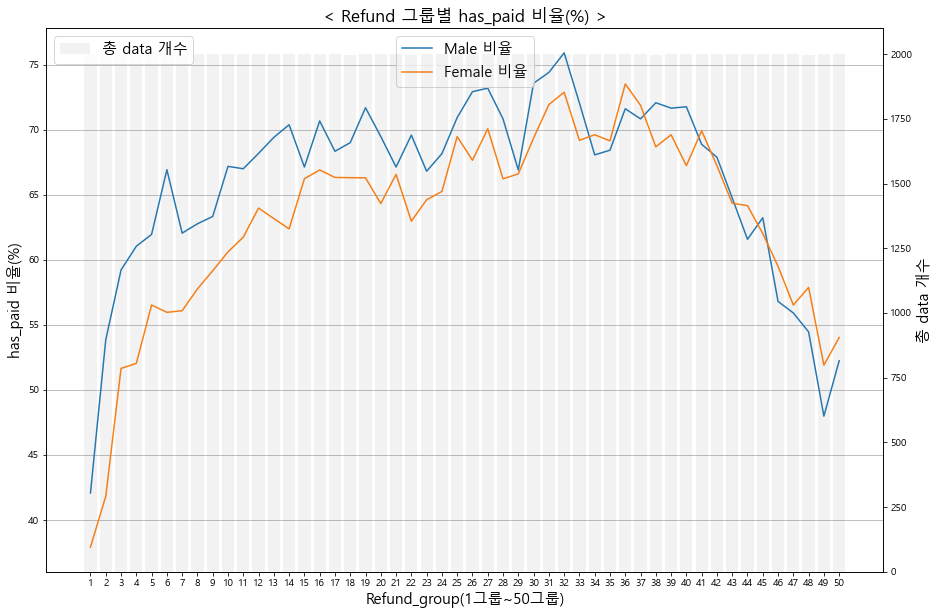

In [220]:
# refund그룹별, 성별에 따른 결제비율 시각화 => 총 data 개수 함께 표기

m_paid_rate, m_total = get_paid_rate_by_refund("M")
f_paid_rate, f_total = get_paid_rate_by_refund("F")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # ax1과 x축을 공유하는 ax2 셋팅
fig.set_size_inches(15,10)  # 사이즈 설정

# 성별에 따른 결제비율 lineplot 출력
sns.lineplot(m_paid_rate.index, m_paid_rate.values, ax=ax1)  # male 그래프
sns.lineplot(f_paid_rate.index, f_paid_rate.values, ax=ax1)  # female 그래프
ax1.grid(axis="y")  # 격자무늬 => 가로방향만 출력
plt.xticks(np.arange(1, 51, step=1))  # x축 나이대 표기 설정
ax1.legend(["Male 비율", "Female 비율"], loc="upper center", fontsize=15)
ax1.set_xlabel("Refund_group(1그룹~50그룹)", fontsize=15)
ax1.set_ylabel("has_paid 비율(%)", fontsize=15)

# 총 data 개수 bar그래프 출력
total = f_total.fillna(0) + m_total.fillna(0)
ax2.bar(total.index, total.values, color="gray", alpha=0.1)  # 투명도 등 설정
ax2.legend(["총 data 개수"], loc="upper left", fontsize=15)
ax2.set_ylabel("총 data 개수", fontsize=15)

plt.title("< Refund 그룹별 has_paid 비율(%) >", fontsize=17)
plt.show()

> Refund 금액수준별 추이 확인 결과, 중간 그룹(10~39그룹)의 결제비율이 높게 나타남

> refund 금액이 낮은 하위 그룹(40\~50그룹)과 함께 최상위 그룹(1\~9그룹)의 결제비율이 상대적으로 낮게 나타난 점은 주목할 필요 있음

#### (추가) 나이대별 Refund 평균금액 그래프 출력 및 함께 참조

In [221]:
# 각 성별에 대한 나이대별 refund 평균치 산출 함수 정의
def get_refund_mean(gender):
    # 해당 gender 기준, 나이대별 총 data 개수 산출
    gender_total = df_v1[df_v1["gender"] != "-"].groupby(["age", "gender"])["has_paid"].count().unstack()[gender]
    
    # 해당 gender 기준, 나이대별 "refund" 평균치 산출
    gender_refund = df_v1[df_v1["gender"] != "-"].groupby(["age", "gender"])["refund"].mean().unstack()[gender]
    
    return gender_refund, gender_total

c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hj\.conda\envs\pydata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


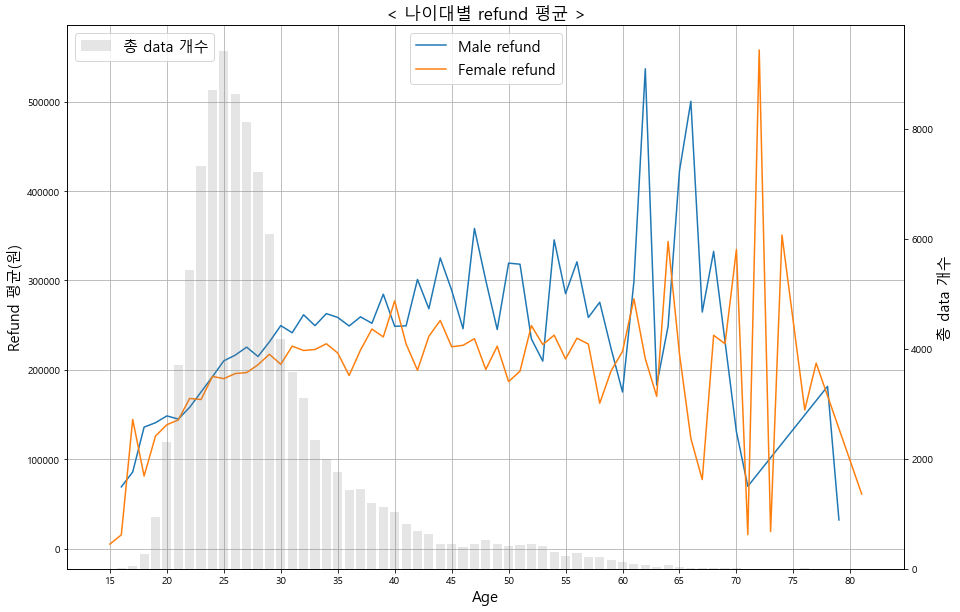

In [222]:
# 나이대별, 성별에 따른 refund 평균치 시각화 => 총 data 개수 함께 표기

m_refund_mean, m_total = get_refund_mean("M")
f_refund_mean, f_total = get_refund_mean("F")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # ax1과 x축을 공유하는 ax2 셋팅
fig.set_size_inches(15,10)  # 사이즈 설정

# 성별에 따른 refund 평균치 lineplot 출력
sns.lineplot(m_refund_mean.index, m_refund_mean.values, ax=ax1)  # male 그래프
sns.lineplot(f_refund_mean.index, f_refund_mean.values, ax=ax1)  # female 그래프
ax1.grid()  # 격자무늬
plt.xticks(np.arange(15, 82, step=5))  # x축 나이대 표기 설정
ax1.legend(["Male refund", "Female refund"], loc="upper center", fontsize=15)
ax1.set_xlabel("Age", fontsize=15)
ax1.set_ylabel("Refund 평균(원)", fontsize=15)

# 총 data 개수 bar그래프 출력
total = f_total.fillna(0) + m_total.fillna(0)
ax2.bar(total.index, total.values, color="gray", alpha=0.2)  # 투명도 등 설정
ax2.legend(["총 data 개수"], loc="upper left", fontsize=15)
ax2.set_ylabel("총 data 개수", fontsize=15)

plt.title("< 나이대별 refund 평균 >", fontsize=17)
plt.show()

> 총 data 개수와 함께 고려했을 때, 나이가 많을수록 Refund 평균금액도 상승하는 추세로 나타남

> 여성보다는 남성의 Refund 평균금액이 상대적으로 높은 것으로 확인됨

### => Refund 금액 기준으로 봤을 때 가장 큰 최상위 그룹보다는 오히려 중간그룹에서 고객의 결제비율이 상대적으로 높은 것으로 확인되며,
### => Refund 금액의 크기는 50대까지는 대체적으로 나이와 함께 증가하는 것으로 나타남
### => 또한, 남성이 여성보다 결제비율이 전반적으로 높게 나타나는 점 거듭 확인됨